# STEP 1: IMPORT LIBRARIES/DATASETS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test , y_test) = cifar10.load_data()

Using TensorFlow backend.
C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\e

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_test.shape

(10000, 1)

# STEP #2: VISUALIZE DATA

[4]


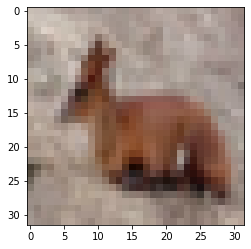

In [9]:
i = 1004
plt.imshow(X_train[i])
print(y_train[i])

C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


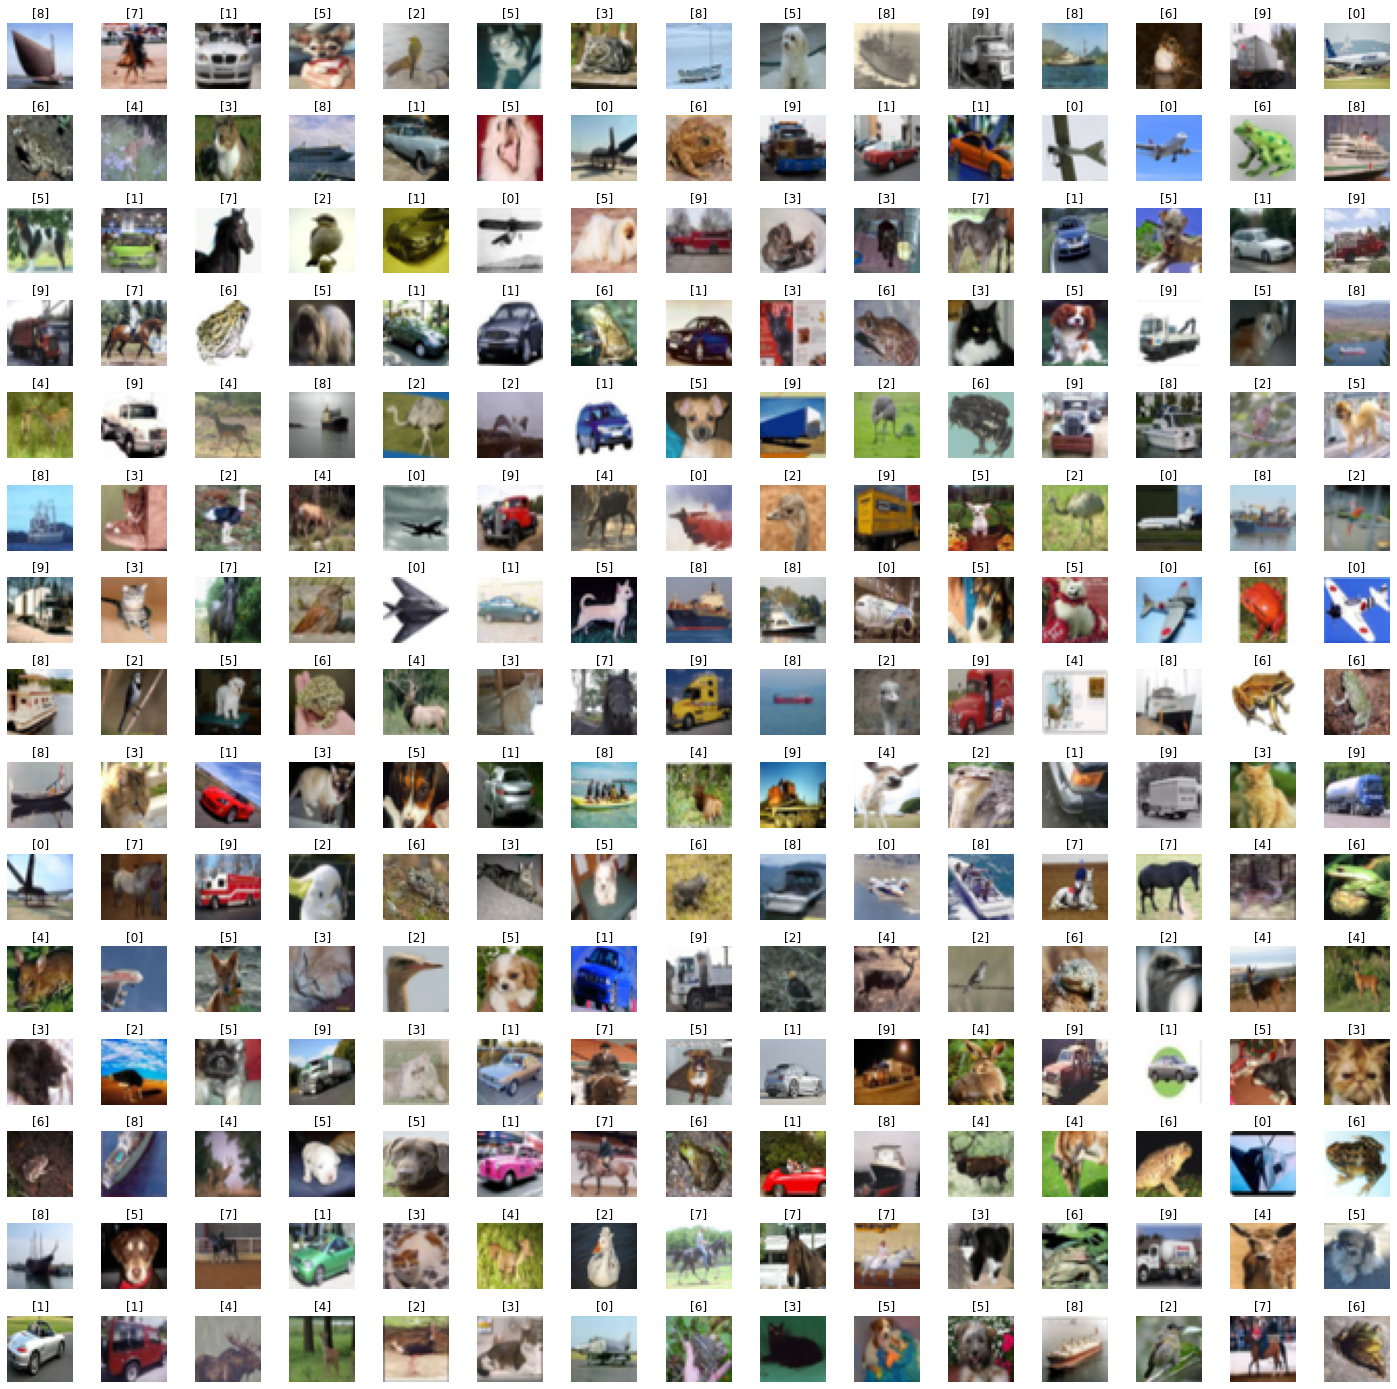

In [10]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel() 
# ravel is use to flaten the matrix 
n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # Pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis("off")
plt.subplots_adjust(hspace = 0.4)    

#  STEP #3: DATA PREPARATION

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype("float32")

In [12]:
number_cat = 10

In [13]:
#This function returns a matrix of binary values (either ‘1’ or ‘0’). It has number of rows equal to the length of the input vector and number of columns equal to the number of classes.
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
X_train
#Here we have bunch of numbers indicating the value of the pixels.

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [16]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [17]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [18]:
X_train = X_train / 255
X_test = X_test / 255
# 0 - 255 indicating the colors in the rgb channel, we want to normalize it

In [19]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [20]:
X_train.shape

(50000, 32, 32, 3)

In [21]:
Input_shape = X_train.shape[1:]

In [22]:
Input_shape

(32, 32, 3)

# STEP #4: TRAIN THE MODEL

In [23]:
from keras.models import  Sequential
# Sequential means we are going to build our model in a sequential fashion, from left to right.
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [24]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(AveragePooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 62, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(AveragePooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))

cnn_model.add(Dense(units = 512, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))
# Relu is use for Regression and softmax is use for classification

In [25]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop(lr = 0.001), metrics = ['accuracy'])

In [26]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 1, shuffle = True)


Epoch 1/1
50000/50000 [==============================] - 168s 3ms/step - loss: 1.6136 - accuracy: 0.4162


# STEP #5: EVALUATING THE MODEL

In [27]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 7s 654us/step
Test Accuracy: 0.506600022315979


In [28]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([3, 8, 8, ..., 5, 6, 7], dtype=int64)

In [29]:
y_test = y_test.argmax(1)

In [30]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

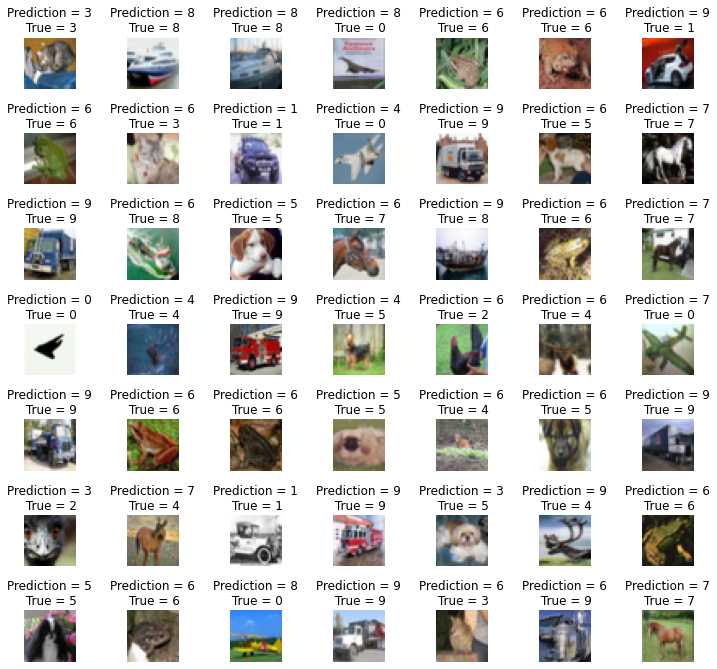

In [31]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)   

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm

array([[487,  21,  32,  39,  75,  31,  62,  59, 143,  51],
       [ 33, 561,   1,  15,  10,  13, 126,  27,  37, 177],
       [ 50,   4, 155,  62, 247, 115, 255,  85,  17,  10],
       [  2,   4,  15, 175,  84, 226, 389,  77,  12,  16],
       [ 14,   0,  14,  19, 458,  39, 298, 145,   9,   4],
       [  4,   0,  19,  77,  74, 472, 233, 111,   3,   7],
       [  0,   2,   4,  25,  53,  10, 879,  22,   1,   4],
       [  3,   0,   3,  28,  81,  86,  93, 695,   3,   8],
       [134,  43,  15,  23,  21,  15,  81,  25, 572,  71],
       [ 34, 104,   3,  20,   8,  12, 111,  70,  26, 612]], dtype=int64)

<AxesSubplot:>

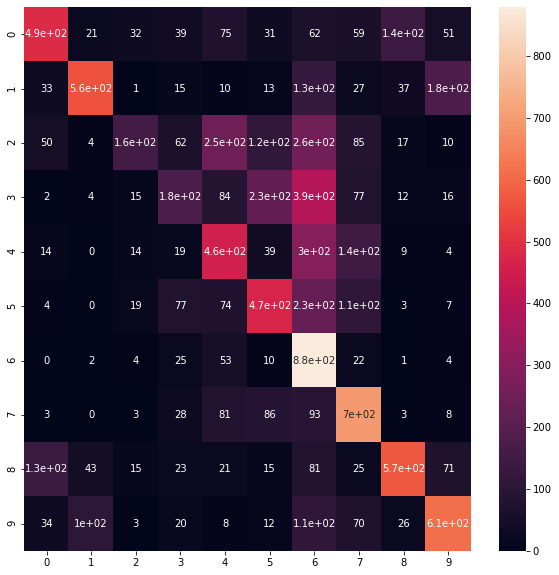

In [33]:
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

# STEP #6: SAVING THE MODEL

In [34]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models')
# cwd = current working directory
if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

# STEP #7: IMPROVING THE MODEL WITH DATA AUGMENTATION

# STEP 7.1 DATA AUGMENTATION FOR THE CIFAR-10 DATASET

In [ ]:
import keras 
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
n = 8
X_train_sample = X_train[:n]
X_train_sample.shape

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
dataget_train = ImageDataGenerator(rotation_range = 90)
dataget_train = ImageDataGenerator(vertical_flip=True)
dataget_train = ImageDataGenerator(height_shift_range=0.5)

dataget_train = ImageDataGenerator(rotation_range = 90)
dataget_train.fit(X_train_sample)

In [ ]:
from PIL import Image

fig = plt.figure(figsize = (20,2))

for x_batch in dataget_train.flow(X_train_sample, batch_size = n):

     for i in range(0,n):

            ax = fig.add_subplot(1, n, i+1)

            ax.imshow(Image.fromarray(np.uint8(x_batch[i])))

     fig.suptitle('Augmented images (rotated 90 degrees)')

     plt.show()

     break;

# STEP 7.2 MODEL TRAINING USING AUGEMENTED DATASET

In [35]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [36]:
datagen.fit(X_train)

In [37]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)

Epoch 1/2
1563/1563 [==============================] - 167s 107ms/step - loss: 1.7440 - accuracy: 0.3727
Epoch 2/2
1563/1563 [==============================] - 157s 101ms/step - loss: 1.6321 - accuracy: 0.4186 - loss: 1.6326 - accuracy:  - ETA: 0s - loss: 1.6321 - accuracy: 


In [ ]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

In [ ]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)